In [32]:
import benchmax.evaluation as ev
import pandas
import matplotlib.pyplot as plt

stats = pandas.read_csv('stats_smtrat_24-01-03_10:40.csv', header=[0,1], index_col=0)

/tmp/ipykernel_16789/1230716885.py:5: DtypeWarning: Columns (272,273,274,275,276,277,278,280,467,468,469,470,471,472,473,475,1445,1640) have mixed types. Specify dtype option on import or set low_memory=False.
  stats = pandas.read_csv('stats_smtrat_24-01-03_10:40.csv', header=[0,1], index_col=0)


# General

In [33]:
results = ev.inspect_answer(stats)
results.loc['memout'] = results.loc['memout'] + results.loc['segfault']
results=results.drop(['invalid','abort','segfault','segmentation fault','no answer','error','wrong','unknown','count'])
results = results[[
    'smtrat-CoveringNG_PPBooleanExploration-development', 'smtrat-CoveringNG_PPBooleanOff-development', 'smtrat-CoveringNG_PPDefault-development',
    'smtrat-CoveringNG_PPImplicantsSotdReverse-development', 'smtrat-CoveringNG_PPImplicantsSizeOnly-development', 'smtrat-CoveringNG_PPImplicantsPickeringTotal-development', 'smtrat-CoveringNG_PPDefault-development',
    'smtrat-CoveringNG_PPVarorderPickering-development', 'smtrat-CoveringNG_PPDefault-development',
    'smtrat-CoveringNG_PPInprocessingOn-development', 'smtrat-CoveringNG_PPDefault-development',
]]
results.columns=pandas.MultiIndex.from_tuples([
    ('Boolean reasoning', 'Exploration'), ('Boolean reasoning', 'Off'), ('Boolean reasoning', 'Propagation'),
    ('Implicant choice', 'Sotd reverse'), ('Implicant choice', 'Size'), ('Implicant choice', 'Feature based'), ('Implicant choice', 'Sotd'),
    ('Variable ordering', 'Feature based'), ('Variable ordering', 'Univariate'),
    ('Preprocessing', 'Gröbner'), ('Preprocessing', 'Off'),
])
results

Boolean reasoning                   Implicant choice         \
              Exploration   Off Propagation     Sotd reverse   Size   
sat                  5169  5153        5184             5164   5169   
unsat                4547  4738        5048             4985   5025   
timeout              2090  1801        1454             1538   1491   
memout                328   442         448              447    449   
solved               9716  9891       10232            10149  10194   

                             Variable ordering            Preprocessing         
        Feature based   Sotd     Feature based Univariate       Gröbner    Off  
sat              5174   5184              5233       5184          5161   5184  
unsat            5046   5048              4588       5048          5047   5048  
timeout          1471   1454              1944       1454          1484   1454  
memout            443    448               369        448           442    448  
solved          10220  10232              9821      10232         10208  10232

In [34]:
plot = ev.performance_profile(stats,ev.get_solvers(stats))
plot.axes.legend(bbox_to_anchor=(1,1))
plot.set_xlim(9400,10300)


(9400.0, 10300.0)

# Boolean reasoning

In [35]:
plot = ev.performance_profile(stats,['smtrat-CoveringNG_PPDefault-development',
       'smtrat-CoveringNG_PPBooleanExploration-development',
       'smtrat-CoveringNG_PPBooleanOff-development',
       #'smtrat-CoveringNG_PPBooleanPartialPropagationSotd-development'
       ])
plot.axes.legend(bbox_to_anchor=(1,1))
plot.set_xlim(9400,10300)

(9400.0, 10300.0)

In [36]:
plt.rcParams["figure.figsize"] = (2,4)
ax = ev.scatter_plot(stats, 'smtrat-CoveringNG_PPDefault-development', 'smtrat-CoveringNG_PPBooleanOff-development', 'smtrat-coveringng_implicants.used.num', True)
ax.set_xlabel('Propagation')
ax.set_ylabel('Off')
ev.scatter_equal_line(ax)
ev.scatter_axis_equal(ax)

In [37]:
plt.rcParams["figure.figsize"] = (4,4)

ax = ev.scatter_plot(stats, 'smtrat-CoveringNG_PPDefault-development', 'smtrat-CoveringNG_PPBooleanExploration-development', 'smtrat-coveringng_implicants.used.num', True)
ax.set_xlabel('Propagation')
ax.set_ylabel('Exploration')
ev.scatter_equal_line(ax)
ev.scatter_axis_equal(ax)


# Misc

<AxesSubplot:xlabel='(smtrat-CoveringNG_PPDefault-development, smtrat-coveringng_intervals.found.num)', ylabel='(smtrat-CoveringNG_PPDefault-development, smtrat-coveringng_intervals.used.num)'>

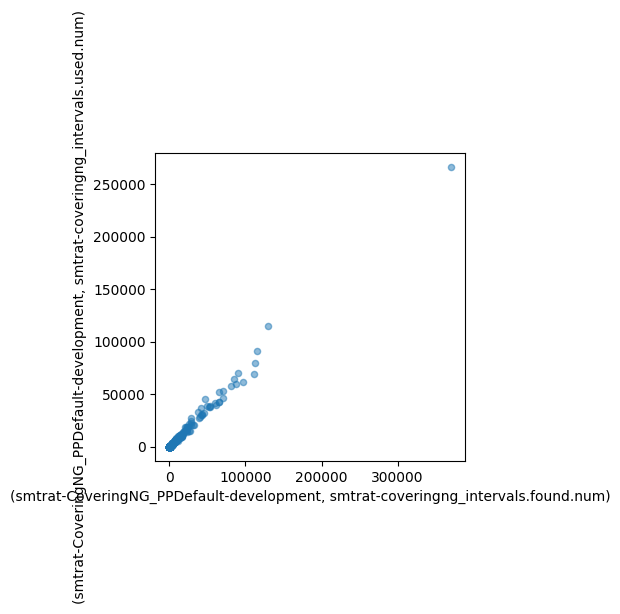

In [38]:
stats.plot.scatter(x=('smtrat-CoveringNG_PPDefault-development', 'smtrat-coveringng_intervals.found.num'), y=('smtrat-CoveringNG_PPDefault-development', 'smtrat-coveringng_intervals.used.num'), alpha=0.5)

# Implicants

In [39]:
plot = ev.performance_profile(stats,['smtrat-CoveringNG_PPDefault-development',
        'smtrat-CoveringNG_PPImplicantsTdeg-development',
       'smtrat-CoveringNG_PPImplicantsPickeringTotal-development',
       'smtrat-CoveringNG_PPImplicantsSizeOnly-development',
       'smtrat-CoveringNG_PPImplicantsSotdReverse-development',])
plot.axes.legend(bbox_to_anchor=(1,1))
plot.set_xlim(9400,10300)

(9400.0, 10300.0)

# Varorder

(9400.0, 10300.0)

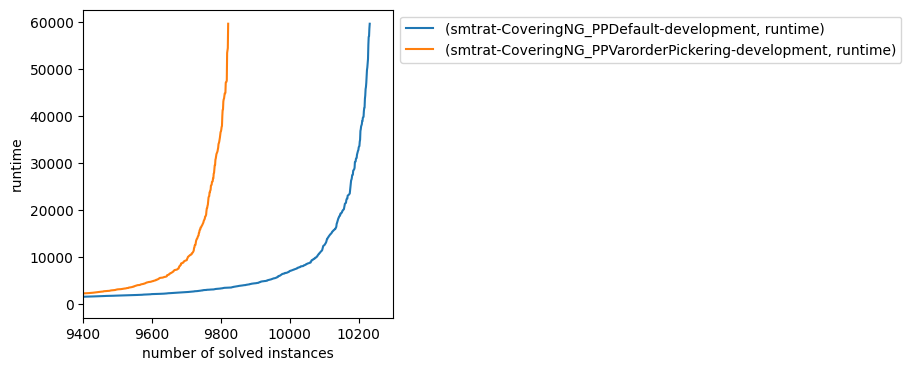

In [40]:
plot = ev.performance_profile(stats,['smtrat-CoveringNG_PPDefault-development','smtrat-CoveringNG_PPVarorderPickering-development'])
plot.axes.legend(bbox_to_anchor=(1,1))
plot.set_xlim(9400,10300)

<AxesSubplot:xlabel='smtrat-CoveringNG_PPDefault-development', ylabel='smtrat-CoveringNG_PPVarorderPickering-development'>

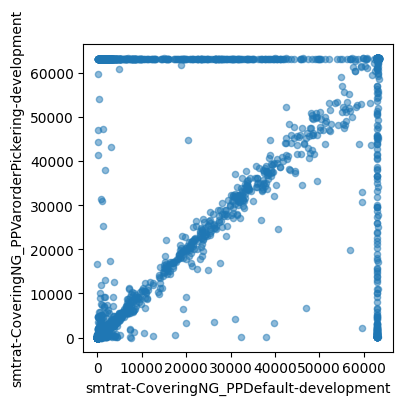

In [41]:
ev.scatter_plot(stats, 'smtrat-CoveringNG_PPDefault-development', 'smtrat-CoveringNG_PPVarorderPickering-development', 'runtime')

In [42]:
len(stats[stats[('smtrat-CoveringNG_PPDefault-development','answer')].isin(['sat','unsat']) & ~stats[('smtrat-CoveringNG_PPVarorderPickering-development','answer')].isin(['sat','unsat'])])

533

In [43]:
len(stats[~stats[('smtrat-CoveringNG_PPDefault-development','answer')].isin(['sat','unsat']) & stats[('smtrat-CoveringNG_PPVarorderPickering-development','answer')].isin(['sat','unsat'])])

122